#Fake News Prediction

About the Dataset:
1. id:unique id for a news article
2. tweet: the text of the article ; could be incomplete
3. label: a label that marks whether the news article is real or fake;

In [7]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Surya Pratap
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
#hese stopwords will be removed
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Preprocessing

In [ ]:
#loading the dataset to a pandas dataframe

In [14]:
news_dataset = pd.read_excel('constraint_English_Train.xlsx')

In [15]:
news_dataset.shape

(5421, 3)

In [16]:
news_dataset.head()

,id,tweet,label
0,1000,The hypochondriac’s guide to convincing yourse...,fake
1,1001,About antibody testing... 1) It is necessary t...,real
2,1002,An intriguing study links COVID-related depres...,real
3,1003,Dr Anthony Fauci said a COVID-19 vaccine must ...,fake
4,1004,No Evidence Hydroxychloroquine Is Helpful In P...,fake


In [18]:
news_dataset['label'].value_counts()

label
real    2819
fake    2602
Name: count, dtype: int64

We found that real and fake news are almost equal which mean almost 50% each, so no attribute effects other

In [19]:
news_dataset.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

So, we see that there are no null values

In [24]:
news_dataset['label']=news_dataset['label'].map({'real':1,'fake':0})

In [25]:
news_dataset.head()

,id,tweet,label
0,1000,The hypochondriac’s guide to convincing yourse...,0
1,1001,About antibody testing... 1) It is necessary t...,1
2,1002,An intriguing study links COVID-related depres...,1
3,1003,Dr Anthony Fauci said a COVID-19 vaccine must ...,0
4,1004,No Evidence Hydroxychloroquine Is Helpful In P...,0


Now separating the label from the dataset

In [29]:
x=news_dataset.drop(columns='label',axis=1)
y=news_dataset['label']

In [32]:
print(x)
print(y)

        id                                              tweet
0     1000  The hypochondriac’s guide to convincing yourse...
1     1001  About antibody testing... 1) It is necessary t...
2     1002  An intriguing study links COVID-related depres...
3     1003  Dr Anthony Fauci said a COVID-19 vaccine must ...
4     1004  No Evidence Hydroxychloroquine Is Helpful In P...
...    ...                                                ...
5416  6416  A tiger tested positive for COVID-19 please st...
5417  6417  ???Autopsies prove that COVID-19 is??� a blood...
5418  6418  _A post claims a COVID-19 vaccine has already ...
5419  6419  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund
5420  6420  It has been 93 days since the last case of COV...

[5421 rows x 2 columns]
0       0
1       1
2       1
3       0
4       0
       ..
5416    0
5417    0
5418    0
5419    0
5420    1
Name: label, Length: 5421, dtype: int64


Stemming: is the process of reducing a word to its root word. removing prefix and suffix

eg. actor, actress, acting --> act 

we need to reduce such words as much as possible to make our model more eefficient

In [33]:
port_stem = PorterStemmer()

In [ ]:
def stem(text):
    stemmed_text = re.sub('[^a-zA-Z]',' ',text)#all the punctuations, commmas, numbers and special characters will be removed
    stemmed_text = stemmed_text.lower()# converting the text to lowercase
    stemmed_text = stemmed_text.split()#converting the text into a list
    stemmed_text = [port_stem.stem(word) for word in stemmed_text if not word in stopwords.words('english')]#here reducing the words to their 
    #root and remeoving the stopwords
    
    stemmed_text = ' '.join(stemmed_text)
    return stemmed_text

now we have to apply this function to the dataset

In [35]:
news_dataset['tweet']=news_dataset['tweet'].apply(stem)

In [37]:
news_dataset.head()

,id,tweet,label
0,1000,hypochondriac guid convinc got covid http co b...,0
1,1001,antibodi test necessari separ test antibodi te...,1
2,1002,intrigu studi link covid relat depress chang c...,1
3,1003,dr anthoni fauci said covid vaccin must deliv ...,0
4,1004,evid hydroxychloroquin help prevent covid stud...,0


In [40]:
X = news_dataset['tweet'].values
Y = news_dataset['label'].values

In [41]:
print(X)

['hypochondriac guid convinc got covid http co bpel mn h http co kgvgcpxcp'
 'antibodi test necessari separ test antibodi test remain small portion cumul test perform us viral test realli scale ton antibodi test grown daili test colorado e g http co scyn aasmv'
 'intrigu studi link covid relat depress chang cn week clinic trend http co fihnbolfha http co uao rybi'
 ... 'post claim covid vaccin alreadi develop caus widespread infertil'
 'aamir khan donat cr pm relief care fund'
 'day sinc last case covid acquir local unknown sourc total number activ case covid new zealand manag isol quarantin facil']


In [42]:
print(Y)

[0 1 1 ... 0 0 1]


Now the compiler cannot understand the textual data
# convertintg the textual data to numerical data

In [43]:
vectorizer= TfidfVectorizer()#counts the frequency of a word and also checks if the word is important or not and also has a meaning or not.

X = vectorizer.fit_transform(X).toarray()

In [ ]:
X
#now the machine learning model can be trained as it now understands the data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5421, 12827))

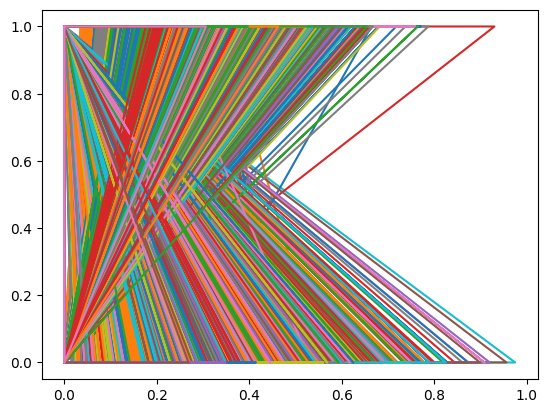

In [47]:
import matplotlib.pyplot as plt
plt.plot(X,Y)

<Axes: >

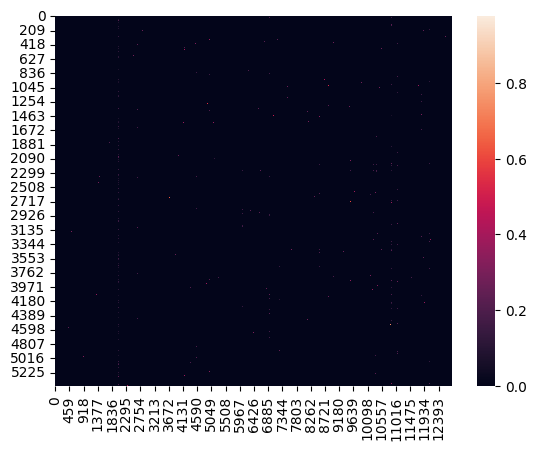

In [52]:
import seaborn as sns
sns.heatmap(X)

splitting and training data

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)#stratify tells that the data should be split in the same ratio
#as the data is split in the original dataset based on equal real and fake values

In [46]:
logisticModel = LogisticRegression()
logisticModel.fit(X_train,Y_train)

LogisticRegression()

#Evaluation

accuracy score

In [57]:
X_train_predict = logisticModel.predict(X_train)
training_accuracy_score = accuracy_score(X_train_predict,Y_train)
print("Accuracy of the training data",training_accuracy_score*100,"%");

Accuracy of the training data 96.63284132841329 %


In [58]:
X_test_predict = logisticModel.predict(X_test)
testing_accuracy_score = accuracy_score(X_test_predict,Y_test)
print("Accuracy of the testing data",testing_accuracy_score*100,"%");

Accuracy of the testing data 91.15207373271889 %


So, the data is performing well for the test data or the new data that it hasn't seen before


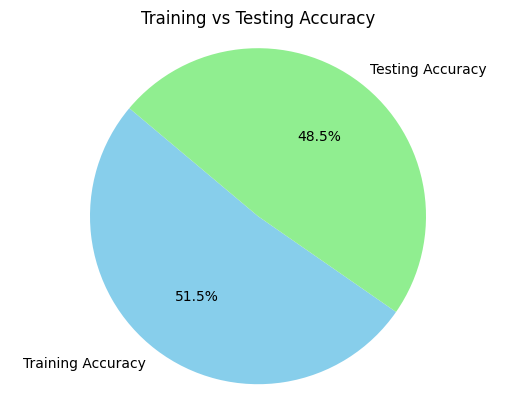

In [60]:
labels = ['Training Accuracy', 'Testing Accuracy']
values = [training_accuracy_score, testing_accuracy_score]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title("Training vs Testing Accuracy")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [75]:
X_new = X_test[1000].reshape(1,-1)

prediction = logisticModel.predict(X_new)
print(prediction)
if(prediction[0]==1):
    print("The news is real")
else:
    print("The news is fake")

[1]
The news is real


In [76]:
print(Y_test[1000])

1
